In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("./data/data.csv")

In [7]:
df.head()

,trip_id,trip_start_time,trip_duration_seconds,user_type,station_id_from,name_from,lat_from,lon_from,station_id_to,name_to,lat_to,lon_to
0,712382,31-12-2016 20:00,223,Member,7051,Wellesley St E / Yonge St Green P,43.66506,-79.38357,7089,Church St / Wood St,43.662712,-79.379903
1,719668,06-01-2017 20:32,162,Member,7051,Wellesley St E / Yonge St Green P,43.66506,-79.38357,7089,Church St / Wood St,43.662712,-79.379903
2,720949,08-01-2017 20:52,194,Member,7051,Wellesley St E / Yonge St Green P,43.66506,-79.38357,7089,Church St / Wood St,43.662712,-79.379903
3,722433,09-01-2017 20:28,159,Member,7051,Wellesley St E / Yonge St Green P,43.66506,-79.38357,7089,Church St / Wood St,43.662712,-79.379903
4,740570,20-01-2017 12:53,222,Member,7051,Wellesley St E / Yonge St Green P,43.66506,-79.38357,7089,Church St / Wood St,43.662712,-79.379903


In [8]:
df.describe()

,trip_id,trip_duration_seconds,station_id_from,lat_from,lon_from,station_id_to,lat_to,lon_to
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.472312e+06,9.552319e+02,7.090282e+03,4.365465e+01,-7.938894e+01,7.072516e+03,4.365409e+01,-7.938710e+01
std,4.839370e+05,1.027557e+04,7.853939e+01,1.031055e-02,1.777368e-02,5.877809e+01,9.506940e-03,1.622448e-02
min,7.123820e+05,2.000000e+00,7.000000e+03,4.362244e+01,-7.948028e+01,7.000000e+03,4.363661e+01,-7.945167e+01
25%,1.049328e+06,4.065000e+02,7.030000e+03,4.364616e+01,-7.939844e+01,7.027000e+03,4.364656e+01,-7.939627e+01
50%,1.425174e+06,6.320000e+02,7.061000e+03,4.365326e+01,-7.938750e+01,7.054000e+03,4.365263e+01,-7.938553e+01
75%,1.887214e+06,9.670000e+02,7.144000e+03,4.366228e+01,-7.937990e+01,7.104000e+03,4.366167e+01,-7.937905e+01
max,2.383646e+06,6.382030e+06,7.488000e+03,4.369402e+01,-7.928898e+01,7.275000e+03,4.368338e+01,-7.932296e+01


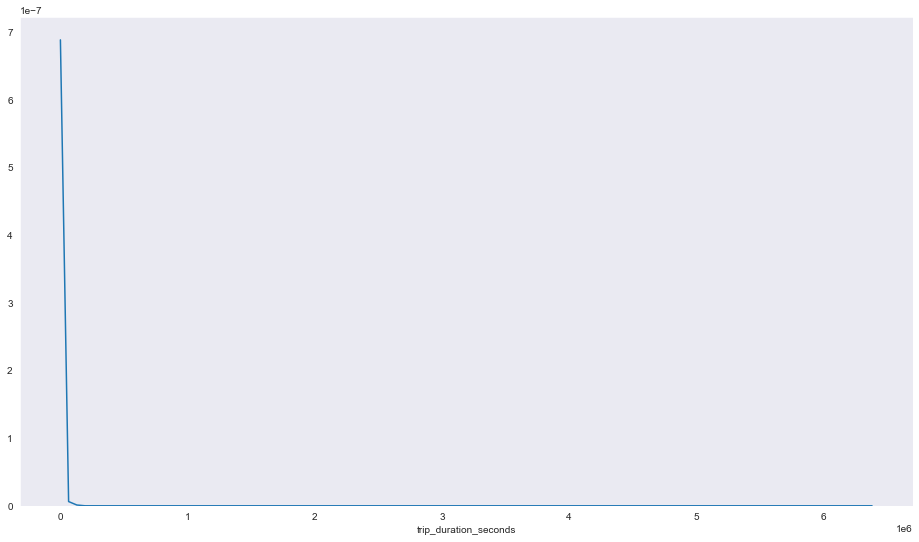

In [11]:
sns.set_style('dark')

fig, ax = plt.subplots(1, 1, figsize = (16, 9))
sns.distplot(df['trip_duration_seconds'], hist = False, ax = ax)

plt.savefig('./visualization/raw_distribution.png')

As visible from the above distribution of the "trip_duration_seconds" columns, there is a massive peak at the 0 seconds mark.<br>This may visualize those people who are trying out how to start a trip but do not necessarily want to ride the bike at that time.<br>Hence, we can remove all ride data that lasts less than 60 seconds

In [12]:
df.shape

(1048575, 12)

### Removing any Trips that are Less Than 60 Seconds

In [13]:
df = df[(df['trip_duration_seconds'] >= 60)]

In [14]:
df.describe()

,trip_id,trip_duration_seconds,station_id_from,lat_from,lon_from,station_id_to,lat_to,lon_to
count,1.029333e+06,1.029333e+06,1.029333e+06,1.029333e+06,1.029333e+06,1.029333e+06,1.029333e+06,1.029333e+06
mean,1.468018e+06,9.726062e+02,7.090586e+03,4.365468e+01,-7.938897e+01,7.072514e+03,4.365411e+01,-7.938710e+01
std,4.855546e+05,1.037037e+04,7.875299e+01,1.030507e-02,1.779570e-02,5.870980e+01,9.487454e-03,1.622042e-02
min,7.123820e+05,6.000000e+01,7.000000e+03,4.362244e+01,-7.948028e+01,7.000000e+03,4.363661e+01,-7.945167e+01
25%,1.043012e+06,4.190000e+02,7.030000e+03,4.364655e+01,-7.939845e+01,7.027000e+03,4.364656e+01,-7.939627e+01
50%,1.416834e+06,6.420000e+02,7.062000e+03,4.365326e+01,-7.938750e+01,7.054000e+03,4.365263e+01,-7.938553e+01
75%,1.885663e+06,9.750000e+02,7.146000e+03,4.366237e+01,-7.938004e+01,7.104000e+03,4.366167e+01,-7.937905e+01
max,2.383646e+06,6.382030e+06,7.488000e+03,4.369402e+01,-7.928898e+01,7.275000e+03,4.368338e+01,-7.932296e+01


In [15]:
df.shape

(1029333, 12)

### Removing any Outliers in the Data

In [16]:
q1 = df['trip_duration_seconds'].quantile(0.25)
q3 = df['trip_duration_seconds'].quantile(0.75)
interquartile_range = q3 - q1

df = df[~((df['trip_duration_seconds'] < (q1 - 1.5 * interquartile_range)) | (df['trip_duration_seconds'] > (q3 + 1.5 * interquartile_range)))].reset_index(drop = True)

In [17]:
df.shape

(974411, 12)

In [18]:
df.to_csv('./data/cyclist_data.csv', index = False)